

1.	word analysis – over time: more word, a sign of free form of expression  
2.	Topic analysis – over time 
3.	Sentiment analysis – over time 


In [28]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.core.display as di
HTML('''<script>

code_show=true;

function code_toggle() {

if (code_show){

$('div.input').hide();

} else {

$('div.input').show();

}

code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

import nltk
from nltk import FreqDist
from nltk.corpus import PlaintextCorpusReader
from wordcloud import WordCloud

# from gensim import corpora,models
# from gensim.models import LdaModel
# from gensim.parsing.preprocessing import remove_stopwords,strip_punctuation, strip_numeric,strip_short


In [2]:
#read csv file 
file_path = 'C:/Users/rui/Desktop/cu/fall2019/STAT5243/Project1-rc3208/data/'
processed_lyrics = pd.read_csv(file_path + "processed_lyrics.csv")

In [3]:
processed_lyrics.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125704 entries, 0 to 125703
Data columns (total 8 columns):
Unnamed: 0      125704 non-null int64
song            125704 non-null object
year            125704 non-null int64
artist          125704 non-null object
genre           125704 non-null object
lyrics          125704 non-null object
id              125704 non-null int64
stemmedwords    125704 non-null object
dtypes: int64(3), object(5)
memory usage: 7.7+ MB


In [4]:
processed_lyrics.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...


In [6]:
processed_lyrics.loc[processed_lyrics["year"]==112,'year']=1998

In [7]:
processed_lyrics.loc[processed_lyrics['year']==702,'year'] = 2002

In [152]:
def times(c):
    if c < 1980:
        return 1970
    elif c < 1990:
        return 1980
    elif c < 2000:
        return 1990
    elif c < 2010:
        return 2000
    elif c < 2020:
        return 2010
    return -1
processed_lyrics['times'] = 0
processed_lyrics['times'] = [times(x) for x in processed_lyrics['year']]
processed_lyrics.head()

,Unnamed: 0,song,year,artist,genre,lyrics,id,stemmedwords,times,wordcount,life,love,friend,date,gloomy,memories
0,1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\r\nI...,1,stop house call home rundown grass overgrown s...,2000,25,0.020149,0.019462,0.001852,0.005995,0.001897,0.006899
1,2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\r\nAs I take your hand and le...,2,unsure hand lead dance floor music die eyes ca...,2000,92,0.021976,0.011664,0.040845,0.000000,0.021831,0.017353
2,3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...,2000,108,0.026984,0.000000,0.000000,0.001393,0.002735,0.009077
3,4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\r\nI threw away...,4,chris fallin fantasy threw destiny stop feelin...,2000,53,0.021790,0.021702,0.000000,0.000000,0.045286,0.062214
4,5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\r\nyou hold my h...,5,touch hold hand hold somethings change somethi...,2000,41,0.002395,0.080758,0.012828,0.054947,0.002683,0.010310


In [153]:
genre_year = processed_lyrics.pivot_table(values = ['year'],index=['genre'], columns=['times'], aggfunc='count', fill_value=0)

In [154]:
genre_year=pd.DataFrame(genre_year.to_records())
genre_year.columns = [x.replace("('year', ", "year.").replace(")", "") \
                     for x in genre_year.columns]
genre_year.rename(columns={genre_year.columns[1]:'genre'},inplace=True)
genre_year

In [162]:
processed_lyrics['wordcount'] = [len(x.split()) for x in processed_lyrics['stemmedwords']]

In [163]:
word_avg=processed_lyrics.pivot_table(values = ['wordcount'],index=['genre'], columns=['times'], aggfunc='mean', fill_value=0)

C:\Users\rui\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


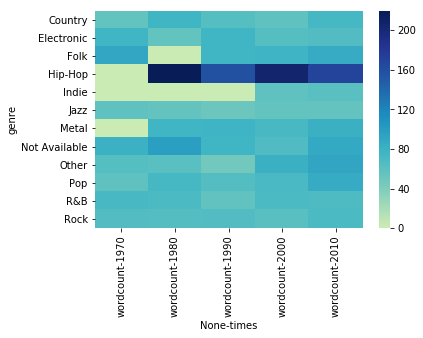

In [164]:
word_avg.as_matrix()
sns.heatmap(word_avg,fmt="d",cmap='YlGnBu',center=processed_lyrics['wordcount'].mean())
plt.show()

In [15]:
from itertools import chain
def get_wordcloud(data):
    Words = [word.split() for word in data['stemmedwords']]
    Text = list(chain(*Words))
    Words_dis=FreqDist(Text)
#     print(Words_dis.most_common(50))
    plot = plt.imshow(WordCloud(background_color = "white").generate(str(Words_dis.most_common(50))))
    plt.axis('off')
    plt.figure(figsize= (10,10))
    plt.show()
    return plot

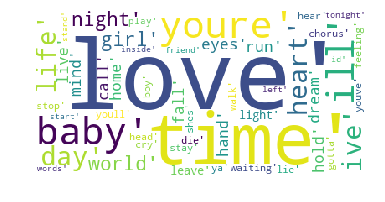

<Figure size 720x720 with 0 Axes>

In [16]:
plot = get_wordcloud(processed_lyrics)
fig = plot.get_figure()


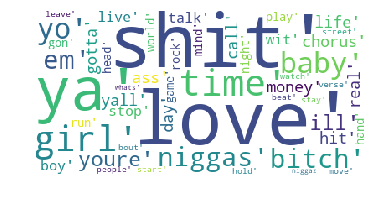

<Figure size 720x720 with 0 Axes>

In [167]:
hiphop = processed_lyrics[processed_lyrics['genre']=='Hip-Hop']
plot = get_wordcloud(hiphop)
fig = plot.get_figure()

Topic modeling 

In [169]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = stopwords.words('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
vectorizer = TfidfVectorizer(stop_words=stop_words,min_df = 0.05)
tfdif = vectorizer.fit_transform(hiphop['stemmedwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
tfdif = vectorizer.fit_transform(processed_lyrics['stemmedwords'])

In [20]:
from sklearn.decomposition import NMF

In [21]:
nmf = NMF(n_components=6)

In [22]:
topic_values = nmf.fit_transform(tfdif)

In [23]:
for topic_num,topic in enumerate(nmf.components_):
    message = 'topic #{} '.format(topic_num+1)
    message += ' '.join(vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 :-1])
    print(message)

topic #1 day life world night live eyes dream light heart
topic #2 love heart hold dream fall feeling cry girl words
topic #3 youre youve youll feeling mind girl friend play head
topic #4 baby girl night call home stop play hold stay
topic #5 time mind ive waiting hard friend stop feeling leave
topic #6 ill ive youll waiting home leave call stay hold


In [24]:
topic_labels = ['life','love','friend','date','gloomy','memories']

In [25]:
topic_df = pd.DataFrame(topic_values,columns=topic_labels)

In [26]:
processed_lyrics = processed_lyrics.join(topic_df)

In [ ]:
processed_lyrics.loc[processed_lyrics['life']>=0.1,'life']=1
processed_lyrics.loc[processed_lyrics['love']>=0.1,'love']=1
processed_lyrics.loc[processed_lyrics['friend']>=0.1,'friend']=1
processed_lyrics.loc[processed_lyrics['date']>=0.1,'date']=1
processed_lyrics.loc[processed_lyrics['gloomy']>=0.1,'gloomy']=1
processed_lyrics.loc[processed_lyrics['memories']>=0.1,'memories']=1
processed_lyrics.loc[processed_lyrics['life']<0.1,'life']=0
processed_lyrics.loc[processed_lyrics['love']<0.1,'love']=0
processed_lyrics.loc[processed_lyrics['friend']<0.1,'friend']=0
processed_lyrics.loc[processed_lyrics['date']<0.1,'date']=0
processed_lyrics.loc[processed_lyrics['gloomy']<0.1,'gloomy']=0
processed_lyrics.loc[processed_lyrics['memories']<0.1,'memories']=0

In [ ]:
year_topics = processed_lyrics.groupby('year').sum().reset_index()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['year'],year_topics['life'],label='life')
plt.plot(year_topics['year'],year_topics['love'],label='love')
plt.plot(year_topics['year'],year_topics['friend'],label='friend')
plt.plot(year_topics['year'],year_topics['date'],label='date')
plt.plot(year_topics['year'],year_topics['gloomy'],label='gloomy')
plt.plot(year_topics['year'],year_topics['memories'],label='memories')
plt.legend()

In [ ]:
year_topics[topic_labels].as_matrix()
sns.heatmap(year_topics[topic_labels],fmt="d",cmap='YlGnBu')
plt.show()

In [ ]:
plot = get_wordcloud(pop[pop['times']==1990])
fig = plot.get_figure()